In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [71]:
!pip install tensorflow

  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl (2.1 kB)
                                              0.0/284.2 MB ? eta -:--:--
                                              0.0/284.2 MB ? eta -:--:--
                                              0.0/284.2 MB ? eta -:--:--
                                              0.0/284.2 MB ? eta -:--:--
                                              0.0/284.2 MB ? eta -:--:--
                                              0.0/284.2 MB ? eta -:--:--
                                            0.1/284.2 MB 280.5 kB/s eta 0:16:53
                                            0.1/284.2 MB 275.8 kB/s eta 0:17:10
                                            0.1/284.2 MB 275.8 kB/s eta 0:17:10
                                            0.1/284.2 MB 261.9 kB/s eta 0:18:05
                                            0.1/284.2 MB 303.9 kB/s eta 0:15:35
                                            0.2/284.2 MB 316.5 kB/s eta 0:14:58
              


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     --------                                60.6/284.2 MB 1.1 MB/s eta 0:03:29
     --------                                60.7/284.2 MB 1.1 MB/s eta 0:03:29
     --------                                60.7/284.2 MB 1.1 MB/s eta 0:03:31
     --------                                60.8/284.2 MB 1.1 MB/s eta 0:03:30
     --------                                60.8/284.2 MB 1.1 MB/s eta 0:03:31
     --------                                60.9/284.2 MB 1.1 MB/s eta 0:03:31
     --------                                61.0/284.2 MB 1.1 MB/s eta 0:03:31
     --------                                61.0/284.2 MB 1.1 MB/s eta 0:03:31
     --------                                61.1/284.2 MB 1.1 MB/s eta 0:03:32
     --------                                61.1/284.2 MB 1.1 MB/s eta 0:03:32
     --------                                61.2/284.2 MB 1.1 MB/s eta 0:03:32
     --------                                61.2/284.2 MB 1.1 MB/s eta 0:03:33
     --------                          

In [4]:
df = pd.read_csv('./Bank Customer Churn Prediction.csv')
df.sample(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2473,15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8140,15572022,605,France,Female,36,6,0.00,1,0,1,690.84,0
4947,15670354,753,France,Female,62,6,0.00,2,1,1,136398.90,0
5119,15668142,700,France,Male,37,3,77608.46,2,1,1,175373.46,0
8925,15805463,682,Germany,Male,32,2,105163.88,2,1,1,164170.46,0
2705,15585835,655,Spain,Female,34,4,109783.69,2,1,0,134034.32,0
4840,15691647,411,France,Female,35,2,0.00,2,1,1,93825.78,0
7427,15664720,714,Spain,Male,33,8,122017.19,1,0,0,162515.17,0
6827,15760216,718,France,Female,49,10,0.00,1,1,0,184474.72,1
4059,15691952,676,France,Male,37,10,106242.67,1,1,1,166678.28,0


In [5]:
#Droping customerid Column 
df = df.drop('customer_id', axis = 1)

In [9]:
df.sample(23)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7479,567,Spain,Male,35,8,153137.74,1,1,0,88659.07,0
7844,612,France,Female,38,1,0.00,2,1,1,9209.21,0
9781,641,France,Female,48,3,147341.43,1,1,1,157458.61,1
223,850,France,Male,33,10,0.00,1,1,0,4861.72,1
6628,596,Spain,Male,57,6,0.00,2,1,1,72402.00,0
1797,647,Germany,Male,44,4,93960.35,1,1,0,36579.53,1
8676,582,France,Male,41,1,40488.76,1,1,0,128528.83,0
7051,643,Spain,Male,43,1,0.00,2,1,1,145764.40,0
2853,487,France,Male,53,4,199689.49,1,1,1,24207.86,1
1199,645,France,Male,41,7,0.00,1,0,1,28667.56,0


In [10]:
scaler = MinMaxScaler()
df[['credit_score','age','tenure','balance','estimated_salary']] = scaler.fit_transform(df[['credit_score','age','tenure','balance','estimated_salary']])

In [19]:
df.head(20)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0
5,0.590,Spain,Male,0.351351,0.8,0.453394,2,1,0,0.748797,1
6,0.944,France,Male,0.432432,0.7,0.000000,2,1,1,0.050261,0
7,0.052,Germany,Female,0.148649,0.4,0.458540,4,1,0,0.596733,1
8,0.302,France,Male,0.351351,0.4,0.566170,2,0,1,0.374680,0
9,0.668,France,Male,0.121622,0.2,0.536488,1,1,1,0.358605,0


In [21]:
df1 = pd.get_dummies(df,columns=['country','gender'])

In [28]:
df1[['country_France','country_Germany','country_Spain','gender_Female','gender_Male']]= df1[['country_France','country_Germany','country_Spain','gender_Female','gender_Male']].astype(int)


In [31]:
df1[['products_number']] = scaler.fit_transform(df1[['products_number']])

In [54]:
df1.shape

(10000, 14)

Text(0.5, 1.0, 'Hist B/W churn_yes and churn_no ')

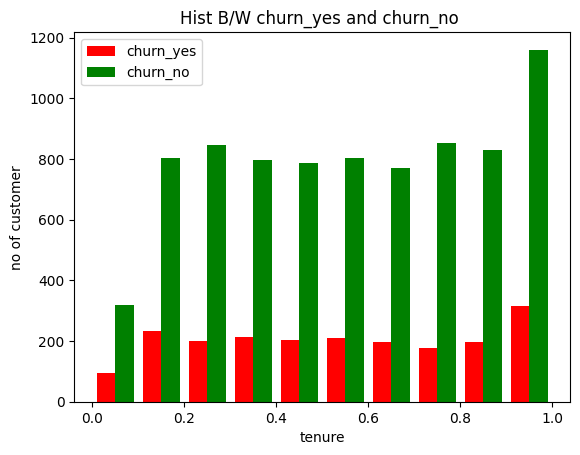

In [43]:
churn_yes = df1[df1.churn == 1].tenure
churn_no = df1[df1.churn == 0].tenure
plt.hist([churn_yes,churn_no], color=['red','green'],label=['churn_yes','churn_no'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('no of customer')
plt.title('Hist B/W churn_yes and churn_no ')


In [61]:
X = df1.drop('churn' ,axis=1)
y = df1['churn']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [66]:
print(len(x_train.columns))
print(x_test.shape)


13
(2000, 13)


In [78]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (13,),activation = 'relu'), # 20 hidden layer and input size is 13
    keras.layers.Dense(8,activation = 'relu'),# 2nd hidden layer
    keras.layers.Dense(1,activation = 'sigmoid')# output layer
])
model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics= ['accuracy']
             )
model.fit(x_train,y_train,epochs =50)


Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.5208 - accuracy: 0.7870
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.7976
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8067
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8125
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8145
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8175
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8202
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8244
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8269
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8294

In [87]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(30,input_shape = (13,),activation = 'relu'), # 20 hidden layer and input size is 13
    keras.layers.Dense(20,activation = 'relu'),# 2nd hidden layer
    keras.layers.Dense(1,activation = 'sigmoid')# output layer
])
model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics= ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='auc')]
             )
model.fit(x_train,y_train,epochs =50)




Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.4956 - accuracy: 0.7950 - precision: 0.3182 - recall_2: 0.0043 - auc: 0.6207
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.8039 - precision: 0.7143 - recall_2: 0.0643 - auc: 0.7222
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8109 - precision: 0.6514 - recall_2: 0.1569 - auc: 0.7445
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.8173 - precision: 0.6707 - recall_2: 0.2047 - auc: 0.7629
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8188 - precision: 0.6591 - recall_2: 0.2310 - auc: 0.7728
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8234 - precision: 0.6752 - recall_2: 0.2586 - auc: 0.7857
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4009 -

In [90]:
model.evaluate(x_test,y_test)


63/63 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8540 - precision: 0.7756 - recall_2: 0.3926 - auc: 0.8512


[0.3570864796638489,
 0.8539999723434448,
 0.7756097316741943,
 0.39259257912635803,
 0.8511776924133301]

In [93]:
yp =model.predict(x_test)
yp[:10]

63/63 [==============================] - 0s 2ms/step


array([[0.0209966 ],
       [0.04129533],
       [0.03381315],
       [0.06109877],
       [0.04931401],
       [0.10876864],
       [0.01099661],
       [0.2743866 ],
       [0.01008189],
       [0.955032  ]], dtype=float32)

In [94]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: churn, dtype: int64

In [101]:
y_pred = []
for item in yp:
    if item > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)        

In [102]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [103]:
df = pd.DataFrame({'actual': y_test[:10],'predict': y_pred[:10]})
df


,actual,predict
7054,0,0
442,0,0
3954,0,0
2288,0,0
3196,0,0
6178,0,0
8351,0,0
5658,1,0
2065,0,0
413,1,1


In [108]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.78      0.39      0.52       405

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.85      0.83      2000



Text(120.72222222222221, 0.5, 'Actual')

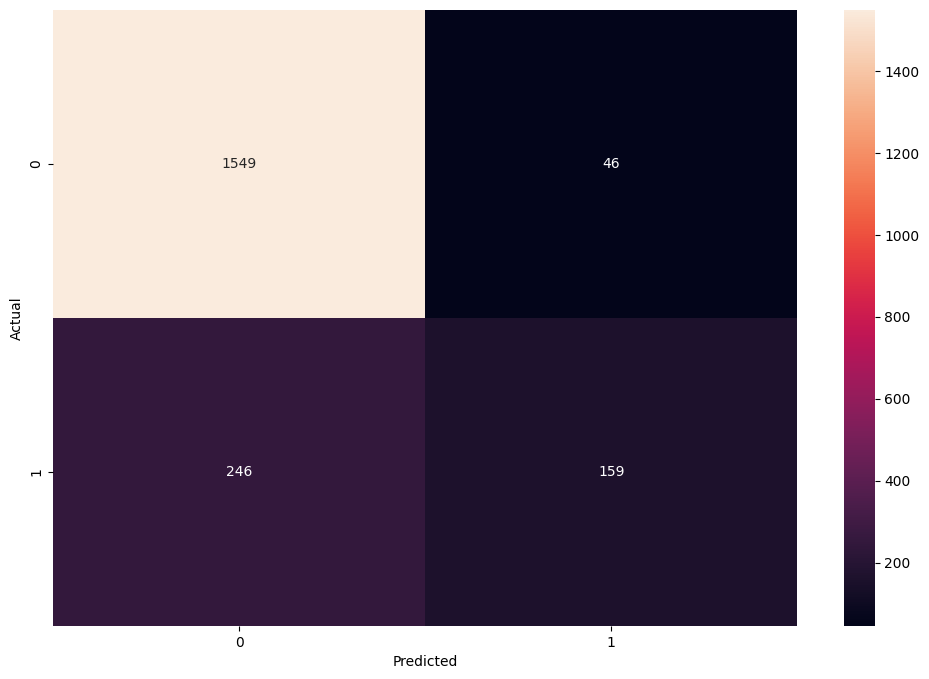

In [112]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize =(12,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')



In [114]:
Accuracy = round((1549+159)/(1549+159+246+46),2)
Accuracy

0.85